In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
z = np.arange(-10,10,0.01)

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

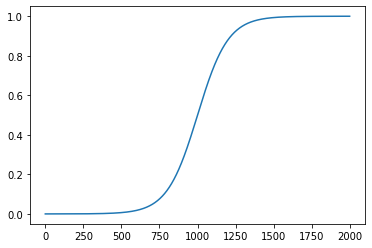

In [4]:
plt.plot(range(len(z)),sigmoid(z))

In [5]:
data = pd.read_csv('test_data_hidden.csv')

In [6]:
x = data.drop('Class',axis=1)
y = data.Class

In [7]:
y = y.values.reshape(y.shape[0],1)

In [9]:
x.shape

(56962, 30)

In [19]:
lr = 0.000000000001
m = np.random.random((x.shape[1],1))
b = 0

for i in range(10):
    z = np.dot(x,m)
    y_hat = sigmoid(z)
    cost =  sum( (y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat)) ) / x.shape[0]
    print(cost)
    error = (y_hat - y)/x.shape[0]
    gradient = np.dot(error.T,x)
    m = m  - lr * gradient.T
    
    

<ipython-input-19-232ed5df6a09>:8: RuntimeWarning: divide by zero encountered in log
  cost =  sum( (y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat)) ) / x.shape[0]
<ipython-input-19-232ed5df6a09>:8: RuntimeWarning: invalid value encountered in multiply
  cost =  sum( (y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat)) ) / x.shape[0]


[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


In [11]:
m = np.random.random((x.shape[1],1))
m.shape

(30, 1)